<a href="https://colab.research.google.com/github/Akbar-1056/bitlabs-project/blob/main/Project_Based_Learning_kelompok_3_cs03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Akbar-1056/bitlabs-project.git

fatal: destination path 'bitlabs-project' already exists and is not an empty directory.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore
import pandas as pd


In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/Dataset_project_Based_Learning/fact__paper__digital_payment_transaction.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Dataset_project_Based_Learning/fact__paper__digital_payment_request.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Dataset_project_Based_Learning/dim__paper__promotion.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Dataset_project_Based_Learning/dim__paper__company.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Dataset_project_Based_Learning/promotion_transaction.csv')



In [ ]:
df1.head()

,dpt_id,dpt_promotion_id,buyer_id,seller_id,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime
0,69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...,unknown,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,20380.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-08-16 09:00:53.297729,2023-08-16 10:24:56.875352
1,961d6f7efde3622da8f35e76e2b53acd84c647a661de86...,unknown,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,14673.6,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-06-09 15:22:49.867524,2023-06-09 15:23:42.718184
2,6441defc089b4ae947cce529904a5c7db2326ede52bdaa...,unknown,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1012500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-10-08 10:45:24.139583,2023-10-09 11:47:23.938359
3,64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...,unknown,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,30000.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-05-26 13:41:27.133014,2023-05-26 13:47:40.595121
4,ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...,unknown,5c19a13a9b229340b584f621b648f4dec7491e12368392...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,1000008.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-05-26 17:29:34.201724,2023-05-26 17:30:04.688498


In [ ]:
df2.head()

,dpt_id,total_fee_amount,document_type_name
0,69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...,380.0,PAY-OUT
1,961d6f7efde3622da8f35e76e2b53acd84c647a661de86...,273.6,PAY-OUT
2,6441defc089b4ae947cce529904a5c7db2326ede52bdaa...,19190.0,PAY-OUT
3,64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...,450.0,PAY-IN
4,ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...,1000.0,PAY-IN


In [ ]:
df3.head()

,dpt_promotion_id,promotion_code,promotion_name,transaction_promo_cashback_amount
0,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,0.0
2,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,0.0


In [ ]:
df4.head()

,company_id,company_kyc_status_name,company_kyb_status_name,company_type_group,company_phone_verified_flag,company_email_verified_flag,user_fraud_flag,testing_account_flag,blacklist_account_flag,package_active_name,company_registered_datetime,missing_data_flag,inconsistency_flag
0,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,AKUN_DIBEKUKAN,BELUM_VALIDASI,PERORANGAN,1.0,0.0,1.0,0.0,0.0,FREE,2023-02-01 17:18:59,0,1
1,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2023-06-08 12:53:10,0,0
2,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2023-03-03 00:46:29,0,0
3,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,BELUM_VALIDASI,BELUM_VALIDASI,PERORANGAN,1.0,0.0,0.0,0.0,0.0,FREE,2022-12-20 15:06:00,0,0
4,5c19a13a9b229340b584f621b648f4dec7491e12368392...,VALIDASI_BERHASIL,BELUM_VALIDASI,PERORANGAN,1.0,1.0,0.0,0.0,0.0,PAPER+ THREE MONTHS,2021-12-07 22:39:58,0,0


In [ ]:
df5.head()

,dpt_id,dpt_promotion_id_x,buyer_id,seller_id,transaction_amount,payment_method_name,payment_provider_name,transaction_created_datetime,transaction_updated_datetime,dpt_promotion_id_y,promotion_code,promotion_name,transaction_promo_cashback_amount
0,69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...,unknown,bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,20380.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-08-16 09:00:53.297729,2023-08-16 10:24:56.875352,NaN,NaN,NaN,0.0
1,961d6f7efde3622da8f35e76e2b53acd84c647a661de86...,unknown,09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,14673.6,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-06-09 15:22:49.867524,2023-06-09 15:23:42.718184,NaN,NaN,NaN,0.0
2,6441defc089b4ae947cce529904a5c7db2326ede52bdaa...,unknown,25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...,5d2233f5a1a6435891142442fac09a77809d0c16496f07...,1012500.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-10-08 10:45:24.139583,2023-10-09 11:47:23.938359,NaN,NaN,NaN,0.0
3,64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...,unknown,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...,30000.0,MITRA_PEMBAYARAN_DIGITAL,BLIBLI,2023-05-26 13:41:27.133014,2023-05-26 13:47:40.595121,NaN,NaN,NaN,0.0
4,ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...,unknown,5c19a13a9b229340b584f621b648f4dec7491e12368392...,5c19a13a9b229340b584f621b648f4dec7491e12368392...,1000008.0,MITRA_PEMBAYARAN_DIGITAL,TOKOPEDIA,2023-05-26 17:29:34.201724,2023-05-26 17:30:04.688498,NaN,NaN,NaN,0.0


**Missing Values**



DF1

In [ ]:
from tabulate import tabulate

# Mengganti nilai NaN dengan 'unknown' secara langsung di df1
df1.fillna('unknown', inplace=True)

# Verifikasi tidak ada nilai NaN
assert df1.isna().sum().sum() == 0, "Masih ada nilai NaN di dataframe!"

# Menampilkan hasil
print("DataFrame df1 setelah mengganti nilai NaN dengan 'unknown':")
print(tabulate(df1.head(), headers='keys', tablefmt='psql'))

df1.to_csv('/content/drive/MyDrive/Dataset_project_Based_Learning/fact__paper__digital_payment_transaction.csv', index=False)  # Menyimpan hasil


DataFrame df1 setelah mengganti nilai NaN dengan 'unknown':
+----+------------------------------------------------------------------+--------------------+------------------------------------------------------------------+------------------------------------------------------------------+----------------------+--------------------------+-------------------------+--------------------------------+--------------------------------+
|    | dpt_id                                                           | dpt_promotion_id   | buyer_id                                                         | seller_id                                                        |   transaction_amount | payment_method_name      | payment_provider_name   | transaction_created_datetime   | transaction_updated_datetime   |
|----+------------------------------------------------------------------+--------------------+------------------------------------------------------------------+-------------------------------------

df3

In [ ]:
merged_data = pd.merge(
    df1,
    df3,
    left_index=True,
    right_index=True,
    how="left"  # Baris di df1 tetap dipertahankan
)
# Simpan hasil merger ke file CSV
merged_data.to_csv('promotion_transaction.csv', index=False)

df4

In [ ]:
import pandas as pd
import os
from tabulate import tabulate

# Menandai baris dengan nilai yang hilang dalam kolom penting
df4['missing_data_flag'] = df4[['user_fraud_flag', 'blacklist_account_flag']].isna().any(axis=1)

# Mengidentifikasi ketidaksesuaian dalam kolom penting
df4['inconsistency_flag'] = (df4['user_fraud_flag'] == 1) & (df4['blacklist_account_flag'] != 1)

# Mengubah nilai boolean menjadi integer (0 dan 1)
df4['missing_data_flag'] = df4['missing_data_flag'].astype(int)
df4['inconsistency_flag'] = df4['inconsistency_flag'].astype(int)

# Mengidentifikasi nilai yang hilang (NaN) dalam kolom penting
missing_data = df4[['user_fraud_flag', 'blacklist_account_flag']].isna().sum()
print("Missing Data Count:")
print(missing_data)
print("\nPercentage of Missing Data:")
print((missing_data / len(df4) * 100).round(2))

# Menyimpan kembali dataframe dengan flag ke file CSV lama
file_path = "/content/drive/MyDrive/Dataset_project_Based_Learning/dim__paper__company.csv"
if os.path.exists(file_path):
    df4.to_csv(file_path, index=False)
    print(f"\nFile updated successfully: {file_path}")
else:
    print(f"File not found: {file_path}")

# Menampilkan hasil dalam format tabel menggunakan tabulate
rows_with_missing_data = df4[df4['missing_data_flag'] == 1]
inconsistencies = df4[df4['inconsistency_flag'] == 1]

if not rows_with_missing_data.empty:
    print("\nMissing Data in Key Fraud-Related Columns (Top 10 Rows):")
    print(tabulate(rows_with_missing_data[['user_fraud_flag', 'blacklist_account_flag', 'missing_data_flag']].head(10), headers='keys', tablefmt='psql'))
else:
    print("\nNo missing data in key fraud-related columns.")

if not inconsistencies.empty:
    print("\nInconsistencies in Key Fraud-Related Columns (Top 10 Rows):")
    print(tabulate(inconsistencies[['user_fraud_flag', 'blacklist_account_flag', 'inconsistency_flag']].head(10), headers='keys', tablefmt='psql'))
else:
    print("\nNo inconsistencies found in key fraud-related columns.")


Missing Data Count:
user_fraud_flag           0
blacklist_account_flag    0
dtype: int64

Percentage of Missing Data:
user_fraud_flag           0.0
blacklist_account_flag    0.0
dtype: float64

File updated successfully: /content/drive/MyDrive/Dataset_project_Based_Learning/dim__paper__company.csv

No missing data in key fraud-related columns.

Inconsistencies in Key Fraud-Related Columns (Top 10 Rows):
+-----+-------------------+--------------------------+----------------------+
|     |   user_fraud_flag |   blacklist_account_flag |   inconsistency_flag |
|-----+-------------------+--------------------------+----------------------|
|   0 |                 1 |                        0 |                    1 |
|  30 |                 1 |                        0 |                    1 |
|  34 |                 1 |                        0 |                    1 |
|  55 |                 1 |                        0 |                    1 |
|  57 |                 1 |                    

future enggenering

Buyer-Seller Relationship Score

In [ ]:
# 1. Menghitung frekuensi interaksi dan volume transaksi
interaction_counts = df1.groupby(['buyer_id', 'seller_id']).size().reset_index(name='transaction_count')
interaction_volumes = df1.groupby(['buyer_id', 'seller_id'])['transaction_amount'].sum().reset_index(name='total_volume')

# 2. Menggabungkan frekuensi dan volume transaksi
interaction_summary = pd.merge(interaction_counts, interaction_volumes, on=['buyer_id', 'seller_id'])

# 3. Normalisasi ke persentase
interaction_summary['transaction_count_percent'] = 100 * interaction_summary['transaction_count'] / interaction_summary['transaction_count'].max()
interaction_summary['total_volume_percent'] = 100 * interaction_summary['total_volume'] / interaction_summary['total_volume'].max()

# 4. Menghitung Relationship Score dalam persentase
interaction_summary['relationship_score'] = (interaction_summary['transaction_count_percent'] + interaction_summary['total_volume_percent']) / 2

# 5. Menggunakan DBSCAN untuk deteksi anomali
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=2, min_samples=5)
interaction_summary['anomaly'] = model.fit_predict(interaction_summary[['relationship_score']])

# 6. Mengubah label anomali ke 1 (anomali) dan 0 (bukan anomali)
interaction_summary['anomaly'] = interaction_summary['anomaly'].apply(lambda x: 1 if x == -1 else 0)

# 7. Menyaring anomali (label 1 berarti anomali)
anomalies = interaction_summary[interaction_summary['anomaly'] == 1]

# 8. Menampilkan 5 baris teratas dari ringkasan dan anomali
from tabulate import tabulate
print("Summary of Buyer-Seller Relationships (Top 5 Rows):")
print(tabulate(interaction_summary[['buyer_id', 'seller_id', 'transaction_count_percent', 'total_volume_percent', 'relationship_score', 'anomaly']].head(), headers='keys', tablefmt='psql'))

print("\nAnomalies in Buyer-Seller Relationships (Top 5 Rows):")
print(tabulate(anomalies[['buyer_id', 'seller_id', 'transaction_count_percent', 'total_volume_percent', 'relationship_score']].head(), headers='keys', tablefmt='psql'))

df1.to_csv('Buyer-Seller Relationship Score.csv', index=False)

Summary of Buyer-Seller Relationships (Top 5 Rows):
+----+------------------------------------------------------------------+------------------------------------------------------------------+-----------------------------+------------------------+----------------------+-----------+
|    | buyer_id                                                         | seller_id                                                        |   transaction_count_percent |   total_volume_percent |   relationship_score |   anomaly |
|----+------------------------------------------------------------------+------------------------------------------------------------------+-----------------------------+------------------------+----------------------+-----------|
|  0 | 00048ebf5503ef1dfb03eec05312583eeb2b57320ac6823710631e7d77ea36c5 | 00048ebf5503ef1dfb03eec05312583eeb2b57320ac6823710631e7d77ea36c5 |                   0.157978  |            0.00124999  |            0.0796139 |         0 |
|  1 | 001046b5061e28476

Transaction Frequency Metrics

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from tabulate import tabulate

#revisi kode dan ganti dbscan nya

# Reset index to make 'transaction_created_datetime' a column again
df1 = df1.reset_index()

# Mengubah kolom transaction_created_datetime menjadi tipe datetime
df1['transaction_created_datetime'] = pd.to_datetime(df1['transaction_created_datetime'])

# Atur index pada kolom transaction_created_datetime untuk analisis time series
# df1.set_index('transaction_created_datetime', inplace=True) # This line is not needed and caused the confusion

# Hitung frekuensi transaksi harian, menambahkan buyer_id untuk setiap transaksi
daily_transactions = df1.groupby([df1['transaction_created_datetime'].dt.date, 'buyer_id']).size().reset_index(name='transaction_count')
# Rename the date column directly in the groupby for clarity
daily_transactions.rename(columns={'transaction_created_datetime': 'transaction_date'}, inplace=True)

# Mengidentifikasi lonjakan aktivitas (bursts) dan jeda yang tidak biasa (gaps) menggunakan DBSCAN
# Menyiapkan data untuk DBSCAN
daily_transactions['day_of_year'] = pd.to_datetime(daily_transactions['transaction_date']).dt.dayofyear # Use the correct column name here
X = daily_transactions[['day_of_year', 'transaction_count']]

# Menerapkan DBSCAN
db = DBSCAN(eps=2, min_samples=5).fit(X)
daily_transactions['anomaly'] = db.labels_

# Menyaring transaksi yang merupakan anomali (label = -1)
anomalies = daily_transactions[daily_transactions['anomaly'] == -1]

# Mengelompokkan anomali berdasarkan hari untuk menemukan bursts atau gaps
anomaly_summary = anomalies.groupby(anomalies['transaction_date']).size().reset_index(name='anomaly_count') # Use the correct column name here

# Tampilkan hasil anomali dalam format tabel menggunakan tabulate
print("Anomalies in Transaction Frequency with Buyer ID:")
print(tabulate(anomalies, headers='keys', tablefmt='psql'))

print("\nDaily Summary of Anomalies (Bursts or Gaps):")
print(tabulate(anomaly_summary, headers='keys', tablefmt='psql'))

Anomalies in Transaction Frequency with Buyer ID:
+-------+--------------------+------------------------------------------------------------------+---------------------+---------------+-----------+
|       | transaction_date   | buyer_id                                                         |   transaction_count |   day_of_year |   anomaly |
|-------+--------------------+------------------------------------------------------------------+---------------------+---------------+-----------|
|   951 | 2023-01-24         | 0bb440f2ae8461ca7b424f9b0efddbb2a1993e07a6d629a5b9f82f5818264d1b |                  15 |            24 |        -1 |
|  1009 | 2023-01-25         | 0bb440f2ae8461ca7b424f9b0efddbb2a1993e07a6d629a5b9f82f5818264d1b |                  15 |            25 |        -1 |
|  1099 | 2023-01-27         | 0bb440f2ae8461ca7b424f9b0efddbb2a1993e07a6d629a5b9f82f5818264d1b |                   8 |            27 |        -1 |
|  1158 | 2023-01-28         | 0bb440f2ae8461ca7b424f9b0efddbb

In [ ]:
import pandas as pd

# Mengelompokkan data berdasarkan buyer_id dan promotion_code
promo_usage = df5.groupby(['buyer_id', 'promotion_code']).size().reset_index(name='usage_count')

# Menentukan threshold untuk penyalahgunaan (misalnya, penggunaan lebih dari 2 kali)
threshold = 2
abuse_cases = promo_usage[promo_usage['usage_count'] > threshold]

# Menampilkan kasus penyalahgunaan
print("Detected Promotion Exploitation Cases:")
print(abuse_cases)




Detected Promotion Exploitation Cases:
                                              buyer_id promotion_code  \
38   0fe36baa803c6718b95994af1e4a31cf1cbce48c09a623...    VISAPPRSCNC   
114  3077819ec94241590c88a38ed75fa3ef4bbe5a3328d805...    VISAPPRSCNC   
116  313247bf47c68d46eb70c91ca20dd070b5a012bdaacaff...   VISAPPRSCNC9   
120  3367265f12b5b265841a9105f93b7de451f3d1570305aa...    VISAPPRSCNC   
193  56821ef4aa4cb33ec0b2c606435019ac696872460f73ac...    VISAPPRSCNC   
283  860f276a6f6d37a9e28fe96b5712e4d207a4e4e37f27cc...    VISAPPRSCNC   

     usage_count  
38             4  
114            5  
116            3  
120            3  
193            3  
283            3  


scaling dan normaliisasi

In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Pastikan kolom datetime sudah dalam format datetime
df1[['transaction_created_datetime', 'transaction_updated_datetime']] = df1[['transaction_created_datetime', 'transaction_updated_datetime']].apply(pd.to_datetime)

# Hitung selisih waktu dalam detik
df1['time_difference'] = (df1['transaction_updated_datetime'] - df1['transaction_created_datetime']).dt.total_seconds()

# Inisialisasi RobustScaler
scaler = RobustScaler()

# Terapkan RobustScaler pada transaction_amount dan time_difference
df1[['scaled_transaction_amount', 'scaled_time_difference']] = pd.DataFrame(scaler.fit_transform(df1[['transaction_amount', 'time_difference']]), index=df1.index)

# Tampilkan beberapa baris hasil
print(df1.head())

                                              dpt_id dpt_promotion_id  \
0  69e9566b3f4d6cb7db2216121b0cd0308c516e680e9c78...          unknown   
1  961d6f7efde3622da8f35e76e2b53acd84c647a661de86...          unknown   
2  6441defc089b4ae947cce529904a5c7db2326ede52bdaa...          unknown   
3  64152dd86b2c5d1af6aaa911e7a229dc539273e0a7b8be...          unknown   
4  ae4ddde99c8fe7f73fb3c2ee0e157e886b52417ece17bd...          unknown   

                                            buyer_id  \
0  bbce610a3267808752a7ec263a7ecfbe76a4987d529bcb...   
1  09eb3b80abae1238ef39d50b66215e02e1ac9891ad6e8f...   
2  25d0774533d69564d0deca724a55a76c693ed5f7ffa12a...   
3  5b846313375cb4f4d065e50a05833dc3ac20ba3f532bbe...   
4  5c19a13a9b229340b584f621b648f4dec7491e12368392...   

                                           seller_id  transaction_amount  \
0  5d2233f5a1a6435891142442fac09a77809d0c16496f07...             20380.0   
1  5d2233f5a1a6435891142442fac09a77809d0c16496f07...             14673.6

EDA

Statistik Deskriptif Sebelum Transformasi:
count    5.000000e+04
mean     1.965125e+07
std      1.057004e+08
min      0.000000e+00
25%      7.000043e+04
50%      1.850172e+06
75%      1.398597e+07
max      2.014010e+10
Name: transaction_amount, dtype: float64

Statistik Deskriptif Setelah Transformasi Log:
count    50000.000000
mean        13.979154
std          2.986957
min          0.000000
25%         11.156271
50%         14.430790
75%         16.453566
max         23.725979
Name: log_transaction_amount, dtype: float64


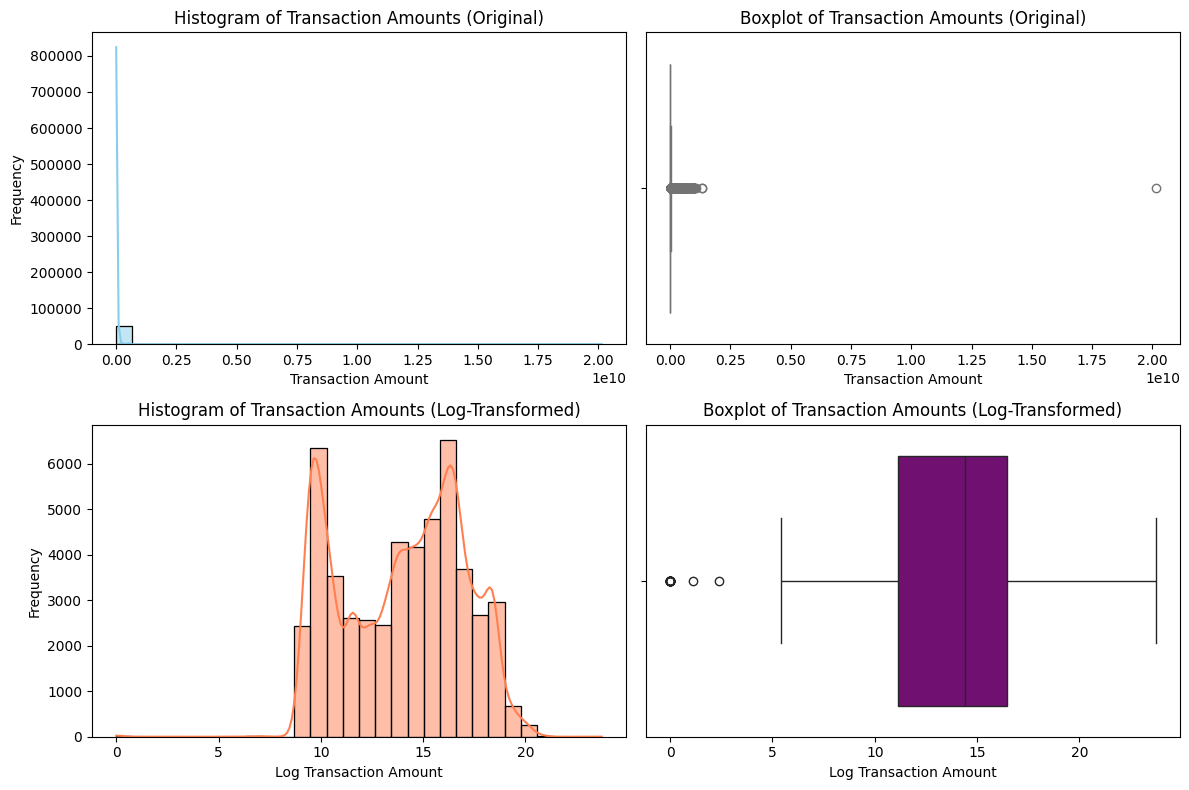


Jumlah Outlier pada Data Log-Transformed: 28
Outliers pada Data Log-Transformed:
                                                  dpt_id dpt_promotion_id  \
1105   fa13dbf2216b698423da8348dc33385c5b83162be6af80...          unknown   
1979   f3643af0f67afeacdce531ba6d4640cc27f4d5c0712e30...          unknown   
2433   a3ce2c6370963b52fda8da00d99a86c0e5e0b9c5df902d...          unknown   
3531   d9bf12137c29d2dd2a3699c40ccf647f06da6703f7d5eb...          unknown   
4705   b37439a1be27fc885fdcb7f775ff4a441851e877cd4928...          unknown   
4992   ddb870db20eabc6ea5361a5f2ccf922f7e5b03d21113fe...          unknown   
5659   43da8e6442dfb08701fefd13faf417c2d859f92fed5c3a...          unknown   
10703  011a1ddb9e7768d220023ff10bae830bd45701a4042c5d...          unknown   
12184  4ea7b13931a77afc95c25387dde1a1c64c76d7784dc1a5...          unknown   
13302  f5cb3c68b3b76c04d56dae8fccb282bea33842b16fd471...          unknown   
13712  e328375804af69a93127664f6817c3e7215251791109ec...          unkno

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh load data, sesuaikan dengan data Anda
# df1 = pd.read_csv('path_to_your_file.csv')

# Analisis statistik dasar
print("Statistik Deskriptif Sebelum Transformasi:")
print(df1['transaction_amount'].describe())

# Transformasi log pada transaction_amount
df1['log_transaction_amount'] = np.log1p(df1['transaction_amount'])  # log1p = log(1 + x)

print("\nStatistik Deskriptif Setelah Transformasi Log:")
print(df1['log_transaction_amount'].describe())

# Visualisasi distribusi sebelum dan sesudah transformasi
plt.figure(figsize=(12, 8))

# Histogram sebelum transformasi
plt.subplot(2, 2, 1)
sns.histplot(df1['transaction_amount'], bins=30, kde=True, color='skyblue')
plt.title("Histogram of Transaction Amounts (Original)")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")

# Boxplot sebelum transformasi
plt.subplot(2, 2, 2)
sns.boxplot(x=df1['transaction_amount'], color='lightgreen')
plt.title("Boxplot of Transaction Amounts (Original)")
plt.xlabel("Transaction Amount")

# Histogram setelah transformasi log
plt.subplot(2, 2, 3)
sns.histplot(df1['log_transaction_amount'], bins=30, kde=True, color='coral')
plt.title("Histogram of Transaction Amounts (Log-Transformed)")
plt.xlabel("Log Transaction Amount")
plt.ylabel("Frequency")

# Boxplot setelah transformasi log
plt.subplot(2, 2, 4)
sns.boxplot(x=df1['log_transaction_amount'], color='purple')
plt.title("Boxplot of Transaction Amounts (Log-Transformed)")
plt.xlabel("Log Transaction Amount")

plt.tight_layout()
plt.show()

# Identifikasi outlier pada data log-transformed menggunakan IQR
Q1 = df1['log_transaction_amount'].quantile(0.25)
Q3 = df1['log_transaction_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

log_outliers = df1[
    (df1['log_transaction_amount'] < lower_bound) |
    (df1['log_transaction_amount'] > upper_bound)
]
print(f"\nJumlah Outlier pada Data Log-Transformed: {len(log_outliers)}")

# Display outliers pada data log-transformed
if not log_outliers.empty:
    print("Outliers pada Data Log-Transformed:")
    print(log_outliers)


Top 10 Buyer-Seller Pairs:
                                   buyer_seller_pair  frequency
0  0bb440f2ae8461ca7b424f9b0efddbb2a1993e07a6d629...       1266
1  10f3200ad77826457a7b33726d1ec95de21ee6400745aa...        321
2  34d1c64bbd54c2912026f19d45b7274b31f3e5f3ca9a81...        294
3  b4c5286fbf6443dd4df37457f3ef23a2b71253b1c86452...        294
4  9506dece8982a8d50fbb2924dd510825ea1516c19852aa...        261
5  2155a0b3ec4ef3cb18f0890eab8177381c7e96dad96297...        248
6  df43724682fbd651e549d3e2043a9d0d2cc4700545863a...        243
7  02611e2fdd7d730bddbd654baf24f03a739704bcb34c01...        216
8  df49a12bd4d8e5cc564d587ddf36c8b15be260b4b048e8...        215
9  0719f2ed66328a141dc1807848bcc72edd027567ae4fc4...        210


<ipython-input-9-ff96a4b8f0dd>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


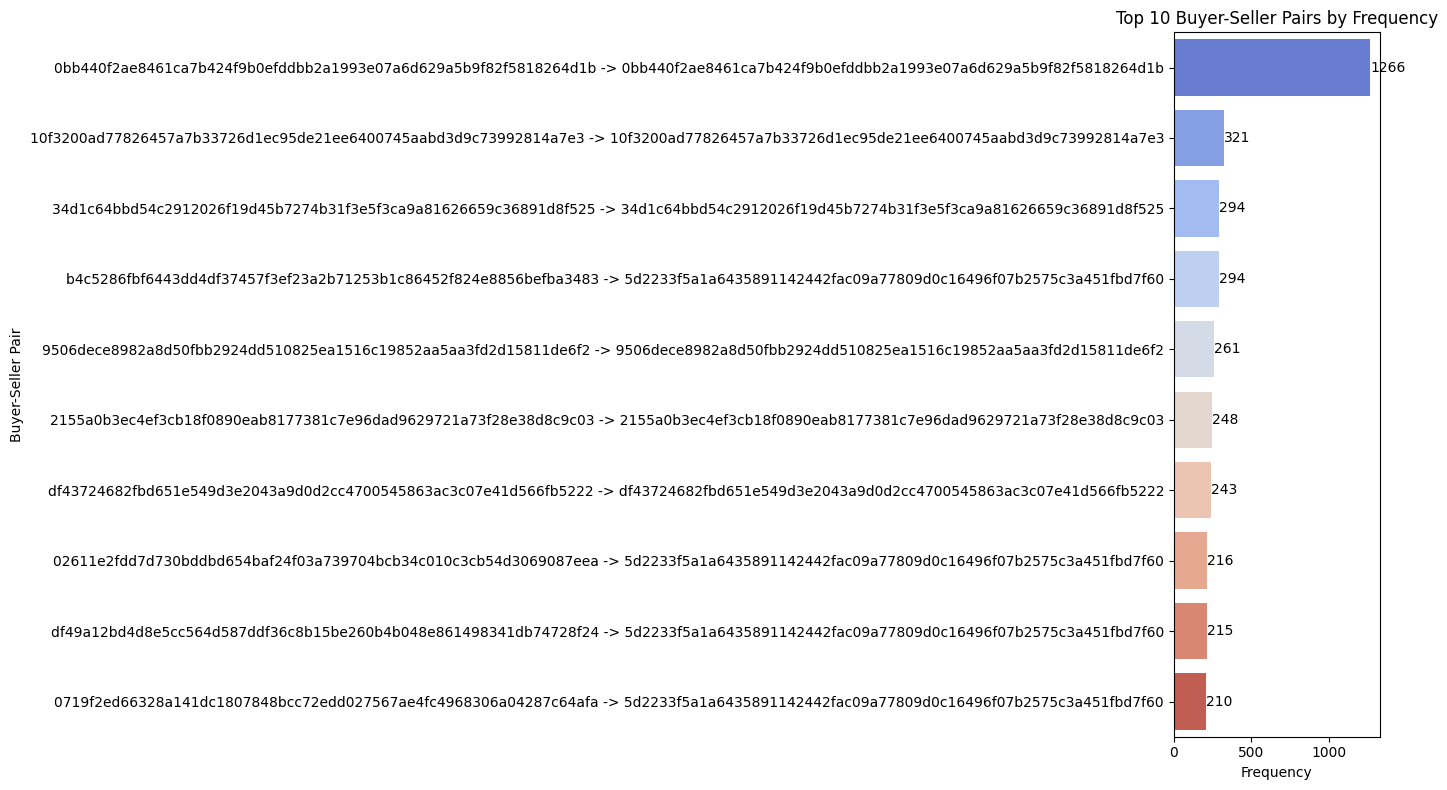

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh load data, sesuaikan dengan data Anda
# df1 = pd.read_csv('path_to_your_file.csv')

# Menggabungkan buyer_id dan seller_id menjadi pasangan unik
df1['buyer_seller_pair'] = df1['buyer_id'].astype(str) + ' -> ' + df1['seller_id'].astype(str)

# Menghitung frekuensi setiap pasangan
pair_frequencies = df1['buyer_seller_pair'].value_counts().reset_index()
pair_frequencies.columns = ['buyer_seller_pair', 'frequency']

# Menampilkan pasangan dengan frekuensi tertinggi
print("Top 10 Buyer-Seller Pairs:")
print(pair_frequencies.head(10))

# Visualisasi pasangan dengan frekuensi tertinggi
top_n = 10  # Jumlah pasangan teratas yang akan divisualisasikan
top_pairs = pair_frequencies.head(top_n)

plt.figure(figsize=(14, 8))
sns.barplot(
    x='frequency',
    y='buyer_seller_pair',
    data=top_pairs,
    palette='coolwarm'  # Warna berdasarkan skala
)
plt.title(f"Top {top_n} Buyer-Seller Pairs by Frequency")
plt.xlabel("Frequency")
plt.ylabel("Buyer-Seller Pair")

# Menambahkan label frekuensi pada setiap bar
for index, value in enumerate(top_pairs['frequency']):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()


Total transactions with promotions: 645
                                   promotion_name  total_transactions  \
0                                CB 1% BNI Garuda                   7   
1   Cashback UNIVERSE CARD [100 Pengguna Pertama]                   4   
2                                    Feb-bastic 1                  14   
3                                    Feb-bastic 2                  11   
4                                         KETUPAT                   6   
5                                        MERIAH-1                   3   
6                                        MERIAH-2                   7   
7                         PAPERCARD Welcome Promo                  36   
8                           PAPERVISA - Corporate                   3   
9                       PAPERVISA - Non Corporate                  88   
10              PPRDBS23 DBS Cashback Credit Card                   4   
11             PPRDBSANV DBS Cashback Credit Card                   2   
12         

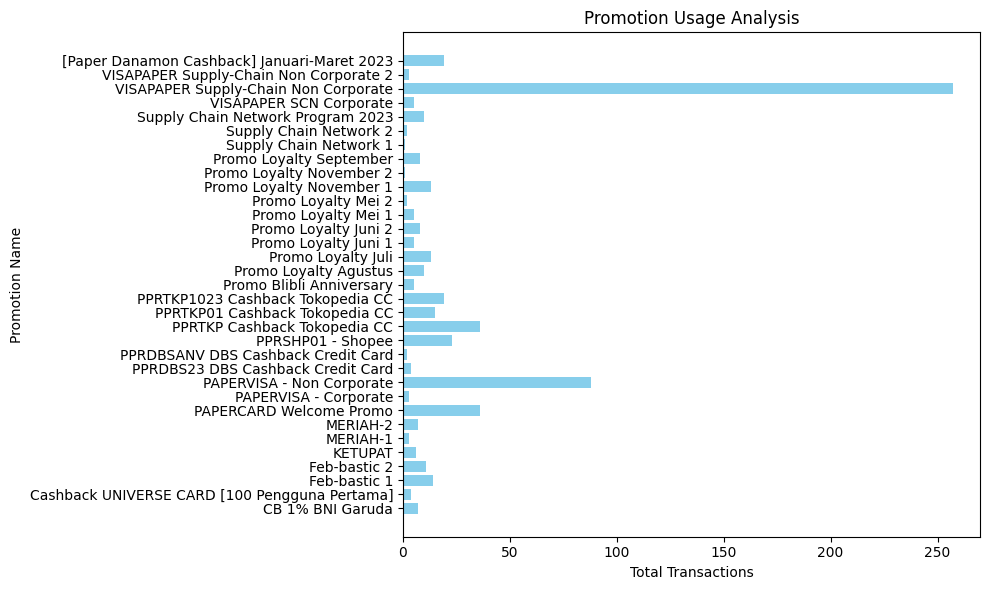

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


# df5 = pd.read_csv('path_to_your_csv_file.csv')

# Pastikan kolom terkait promosi memiliki nama sesuai dataset
promotion_usage = df5.dropna(subset=['promotion_name'])  # Hanya transaksi dengan promosi

# Total transaksi yang menggunakan promosi
total_promotions = promotion_usage['dpt_id'].nunique()
print(f"Total transactions with promotions: {total_promotions}")

# Mengelompokkan data berdasarkan promosi
promotion_stats = promotion_usage.groupby('promotion_name').agg(
    total_transactions=('dpt_id', 'nunique'),
    total_cashback=('transaction_promo_cashback_amount', 'sum'),
    avg_cashback=('transaction_promo_cashback_amount', 'mean')
).reset_index()

print(promotion_stats)

# Visualisasi: Bar plot penggunaan promosi
plt.figure(figsize=(10, 6))
plt.barh(
    promotion_stats['promotion_name'],
    promotion_stats['total_transactions'],
    color='skyblue'
)
plt.xlabel('Total Transactions')
plt.ylabel('Promotion Name')
plt.title('Promotion Usage Analysis')
plt.tight_layout()
plt.show()


<ipython-input-7-9bf0941a1480>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-7-9bf0941a1480>:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


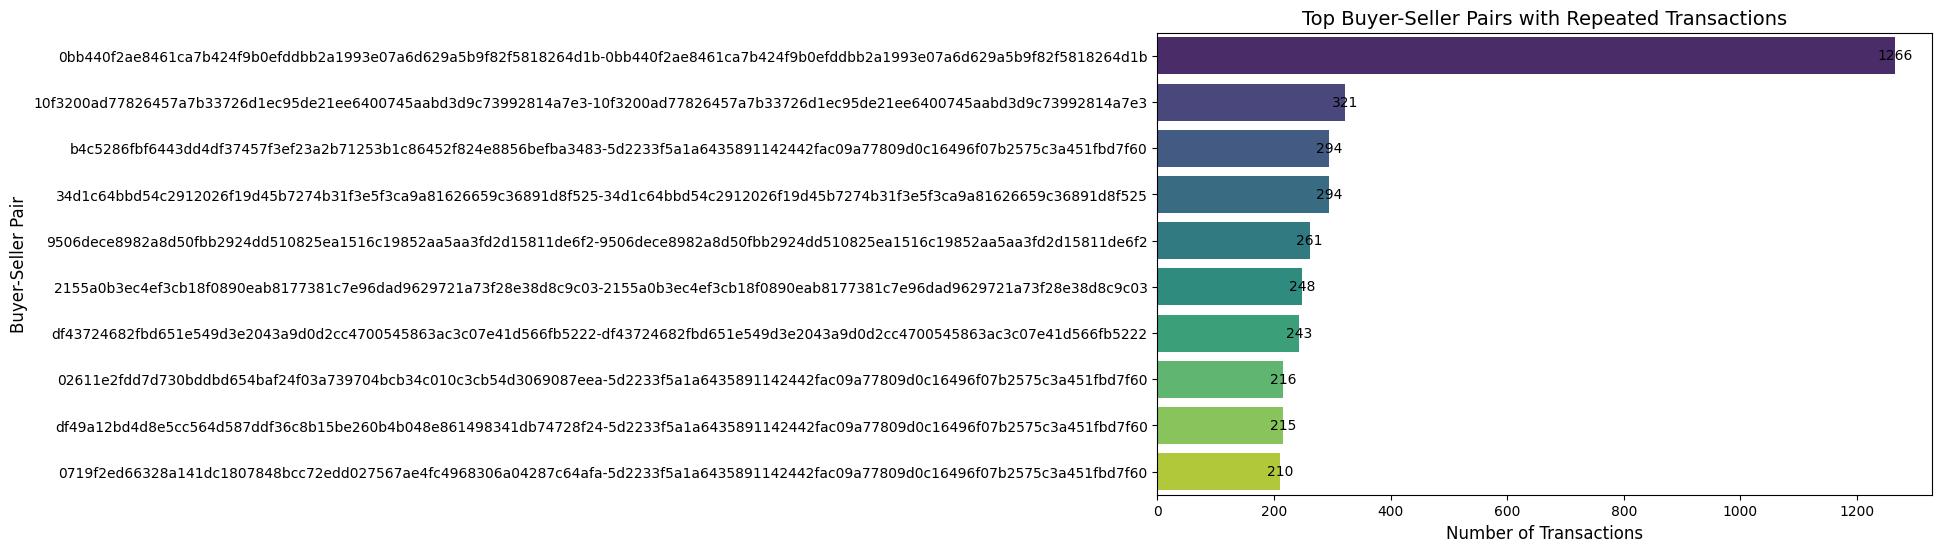

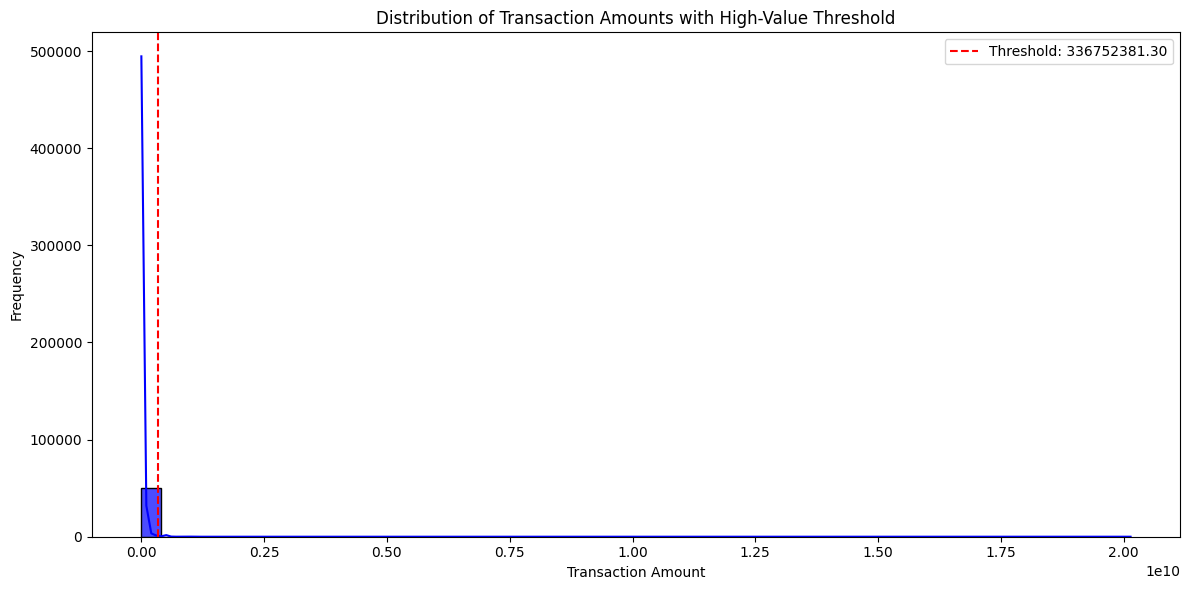

<ipython-input-7-9bf0941a1480>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='transaction_hour', data=df, palette='coolwarm')


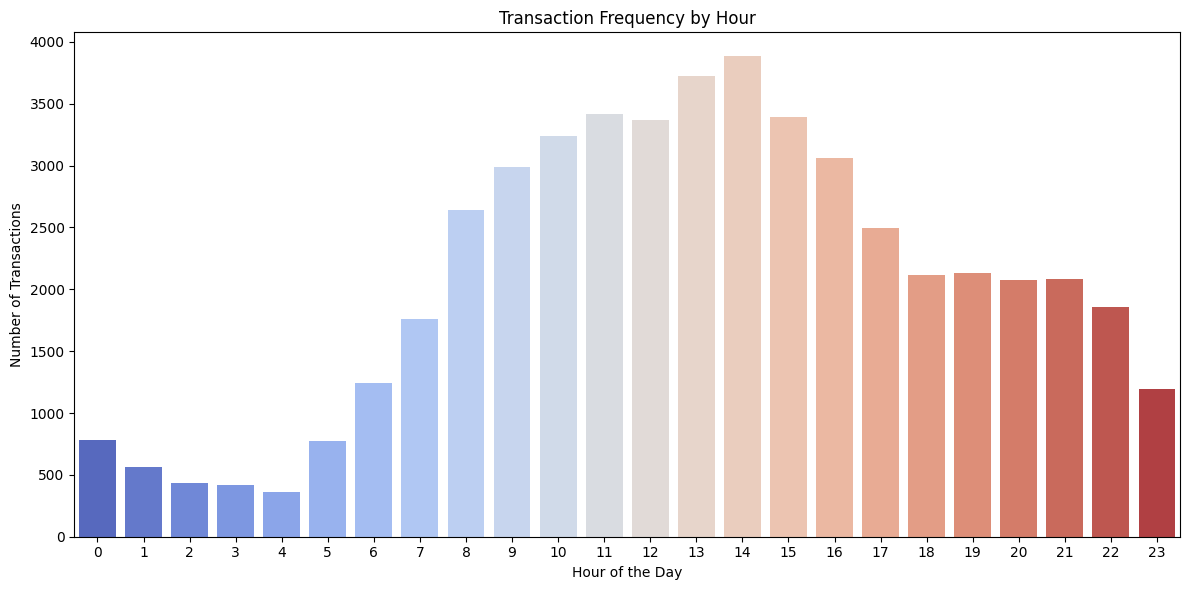

<ipython-input-7-9bf0941a1480>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
<ipython-input-7-9bf0941a1480>:79: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


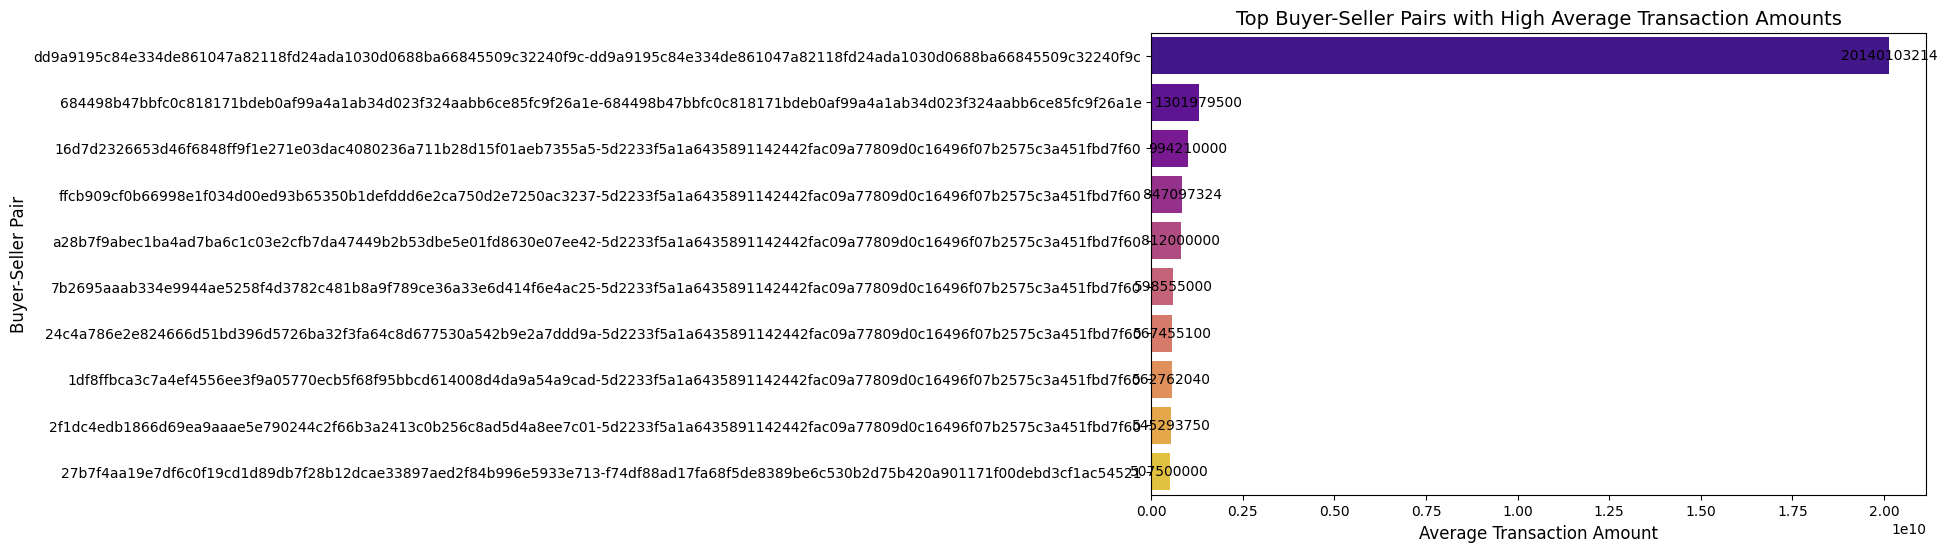

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk menambahkan label pada bar
def add_bar_labels(ax):
    for p in ax.patches:
        ax.text(p.get_width() + 0.2, p.get_y() + p.get_height() / 2,
                f'{p.get_width():.0f}', ha='center', va='center',
                fontsize=10, color='black')

# 1. Investigasi Repeated Transactions
def investigate_repeated_transactions(df, threshold=10, top_n=10):
    df['buyer_seller_pair'] = df['buyer_id'].astype(str) + '-' + df['seller_id'].astype(str)
    repeated_transactions = df.groupby('buyer_seller_pair').size().reset_index(name='transaction_count')
    repeated_pairs = repeated_transactions[repeated_transactions['transaction_count'] > threshold]

    # Visualisasi
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=repeated_pairs.sort_values('transaction_count', ascending=False).head(top_n),
        x='transaction_count', y='buyer_seller_pair', palette='viridis', orient='h'
    )
    add_bar_labels(ax)
    plt.title('Top Buyer-Seller Pairs with Repeated Transactions', fontsize=14)
    plt.xlabel('Number of Transactions', fontsize=12)
    plt.ylabel('Buyer-Seller Pair', fontsize=12)
    plt.tight_layout()
    plt.show()

# 2. Investigasi High Transaction Values
def investigate_high_transaction_values(df):
    mean_amount = df['transaction_amount'].mean()
    std_amount = df['transaction_amount'].std()
    threshold_high = mean_amount + 3 * std_amount
    high_value_transactions = df[df['transaction_amount'] > threshold_high]

    # Visualisasi
    plt.figure(figsize=(12, 6))
    sns.histplot(df['transaction_amount'], kde=True, bins=50, color='blue', alpha=0.7)
    plt.axvline(threshold_high, color='red', linestyle='--', label=f'Threshold: {threshold_high:.2f}')
    plt.title('Distribution of Transaction Amounts with High-Value Threshold')
    plt.xlabel('Transaction Amount')
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()
    plt.show()
    return high_value_transactions, threshold_high

# 3. Investigasi Time Patterns in Transactions
def investigate_time_patterns(df):
    df['transaction_created_datetime'] = pd.to_datetime(df['transaction_created_datetime'])
    df['transaction_hour'] = df['transaction_created_datetime'].dt.hour

    plt.figure(figsize=(12, 6))
    sns.countplot(x='transaction_hour', data=df, palette='coolwarm')
    plt.title('Transaction Frequency by Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Transactions')
    plt.tight_layout()
    plt.show()

# 4. Investigasi High Value Transactions by Buyer-Seller
def investigate_high_value_by_pair(df, threshold_high, top_n=10):
    df['buyer_seller_pair'] = df['buyer_id'].astype(str) + '-' + df['seller_id'].astype(str)
    buyer_seller_stats = df.groupby('buyer_seller_pair')['transaction_amount'].mean().reset_index()
    high_value_pairs = buyer_seller_stats[buyer_seller_stats['transaction_amount'] > threshold_high]

    # Visualisasi
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=high_value_pairs.sort_values('transaction_amount', ascending=False).head(top_n),
        x='transaction_amount', y='buyer_seller_pair', palette='plasma', orient='h'
    )
    add_bar_labels(ax)
    plt.title('Top Buyer-Seller Pairs with High Average Transaction Amounts', fontsize=14)
    plt.xlabel('Average Transaction Amount', fontsize=12)
    plt.ylabel('Buyer-Seller Pair', fontsize=12)
    plt.tight_layout()
    plt.show()

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset_project_Based_Learning/fact__paper__digital_payment_transaction.csv')

# Investigasi
investigate_repeated_transactions(df, threshold=10, top_n=10)
high_value_transactions, threshold_high = investigate_high_transaction_values(df)
investigate_time_patterns(df)
investigate_high_value_by_pair(df, threshold_high, top_n=10)


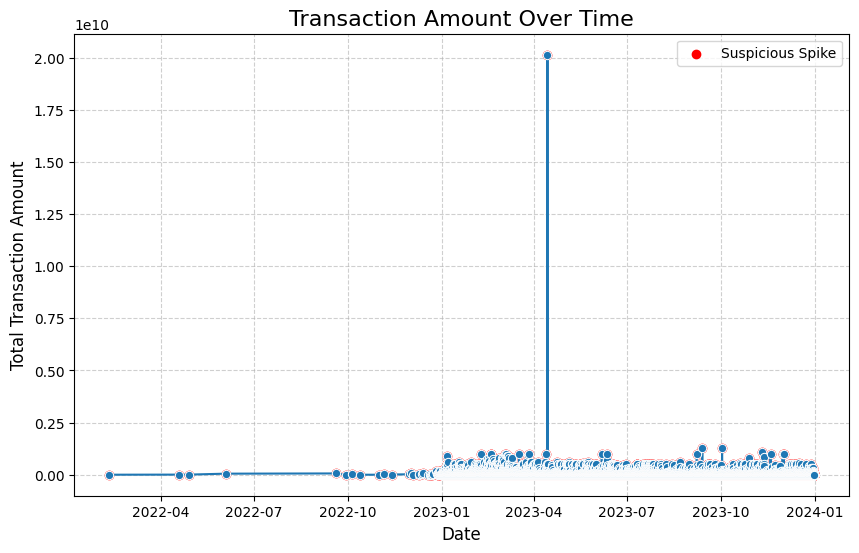

Suspicious Spikes Detected:
      transaction_created_datetime  \
0       2022-02-09 13:00:04.571591   
1       2022-04-18 15:34:13.027719   
2       2022-04-28 10:02:25.820418   
3       2022-06-03 17:03:27.836960   
4       2022-09-19 17:58:05.389664   
...                            ...   
49995   2023-12-30 23:01:54.834531   
49996   2023-12-30 23:07:19.311364   
49997   2023-12-30 23:32:03.866110   
49998   2023-12-30 23:35:36.777571   
49999   2023-12-30 23:41:33.008217   

                                                  dpt_id dpt_promotion_id  \
0      cc3fd409b2797f649b3edc17bb18b9aab6f7c9d79ce571...          unknown   
1      52a53df842245e0d96c3f2ca1253ef9d01491051b15b4b...          unknown   
2      5f6d6616efbe3e2210a3e9451711413a6e652d6e941027...          unknown   
3      4bfc6e221e2556bc40241faf15d87d2ca153493ad7d021...          unknown   
4      6d58b55de5b04268eb0ff4bbc42f816ceadf89971502d0...          unknown   
...                                                  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Pastikan kolom 'transaction_created_datetime' ada di tipe datetime
df1['transaction_created_datetime'] = pd.to_datetime(df1['transaction_created_datetime'])

# 2. Agregasi data berdasarkan tanggal
daily_transactions = df1.groupby('transaction_created_datetime').sum().reset_index()

# 3. Plot data
plt.figure(figsize=(10, 6))
sns.lineplot(data=daily_transactions, x='transaction_created_datetime', y='transaction_amount', marker='o')
plt.title("Transaction Amount Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Transaction Amount", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.6)

# 4. Highlight Suspicious Spikes
threshold = 1000  # Threshold untuk lonjakan mencurigakan
suspicious_data = daily_transactions[daily_transactions['transaction_amount'] > threshold]

# Tandai lonjakan di grafik
plt.scatter(
    suspicious_data['transaction_created_datetime'],
    suspicious_data['transaction_amount'],
    color='red',
    label='Suspicious Spike'
)
plt.legend()
plt.show()

# 5. Tampilkan rincian lonjakan mencurigakan
print("Suspicious Spikes Detected:")
print(suspicious_data)


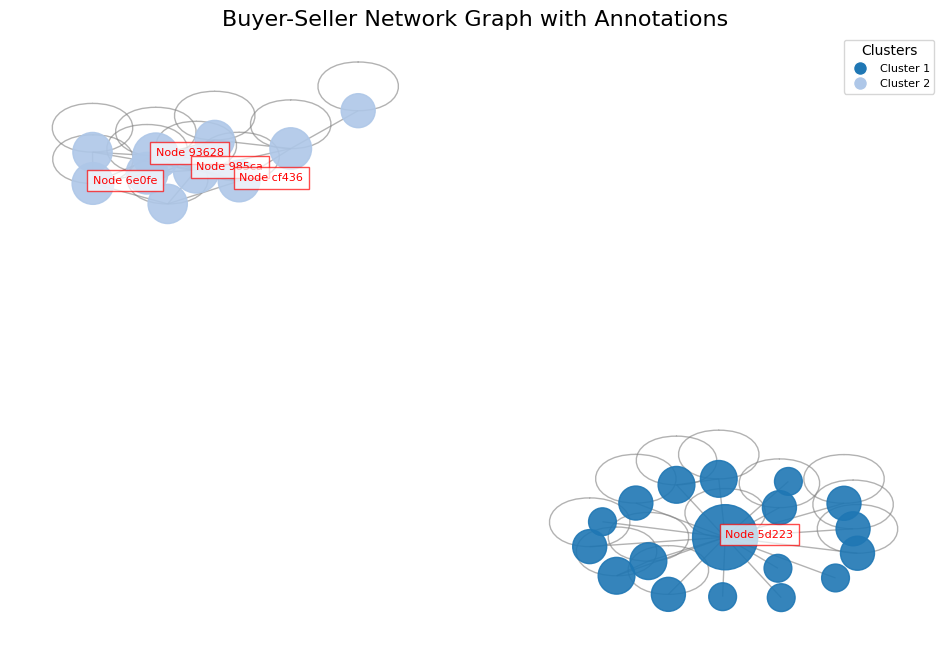

Original Graph - Nodes: 9845, Edges: 10349
Filtered Graph - Nodes: 28, Edges: 60


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# 1. Ambil data buyer_id dan seller_id dari df1
buyer_seller_data = df1[['buyer_id', 'seller_id']]

# 2. Buat graf dengan NetworkX
G = nx.Graph()
edges = list(buyer_seller_data.itertuples(index=False, name=None))
G.add_edges_from(edges)

# 3. Filter node berdasarkan degree threshold
degree_threshold = 5  # Threshold degree untuk filter
filtered_nodes = [node for node in G.nodes if G.degree(node) >= degree_threshold]
H = G.subgraph(filtered_nodes)  # Subgraf hanya untuk node yang difilter

# 4. Identifikasi komponen terhubung
connected_components = list(nx.connected_components(H))
colors = plt.cm.tab20.colors  # Palet warna
color_map = {node: colors[i % len(colors)] for i, component in enumerate(connected_components) for node in component}

# 5. Visualisasi graf
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(H, seed=42)

# Node size dan color
node_sizes = [300 + 100 * H.degree(node) for node in H.nodes]
node_colors = [color_map[node] for node in H.nodes]

nx.draw_networkx_nodes(H, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9)
nx.draw_networkx_edges(H, pos, edge_color='gray', alpha=0.6)

# Tampilkan anotasi untuk node dengan degree tertinggi
top_nodes = sorted(H.nodes, key=lambda n: H.degree(n), reverse=True)[:5]
for node in top_nodes:
    x, y = pos[node]
    plt.text(x, y, f"Node {node[:5]}", fontsize=8, color="red", bbox=dict(facecolor="white", alpha=0.7, edgecolor="red"))

# Judul dan legenda
plt.title("Buyer-Seller Network Graph with Annotations", fontsize=16)
plt.axis("off")

# Buat legenda untuk menunjukkan arti warna
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[i], markersize=10, label=f'Cluster {i+1}')
                   for i in range(len(connected_components))]
plt.legend(handles=legend_elements, loc='upper right', title="Clusters", fontsize=8)

plt.show()

# Analisis tambahan
print(f"Original Graph - Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")
print(f"Filtered Graph - Nodes: {H.number_of_nodes()}, Edges: {H.number_of_edges()}")



<class 'pandas.core.frame.DataFrame'>
Index: 645 entries, 119 to 49970
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   dpt_id                             645 non-null    object        
 1   dpt_promotion_id_x                 645 non-null    object        
 2   buyer_id                           645 non-null    object        
 3   seller_id                          645 non-null    object        
 4   transaction_amount                 645 non-null    float64       
 5   payment_method_name                645 non-null    object        
 6   payment_provider_name              645 non-null    object        
 7   transaction_created_datetime       645 non-null    datetime64[ns]
 8   transaction_updated_datetime       645 non-null    datetime64[ns]
 9   dpt_promotion_id_y                 645 non-null    object        
 10  promotion_code                     645 

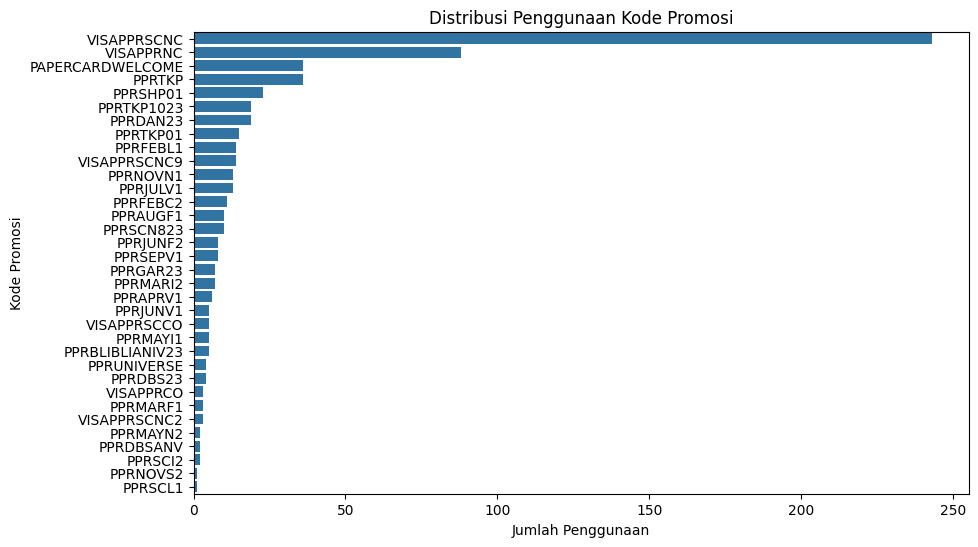

Top 10 Buyers with Most Promotion Usage:
buyer_id
3077819ec94241590c88a38ed75fa3ef4bbe5a3328d805a10d4ce8cba0a7f1f5    6
0fe36baa803c6718b95994af1e4a31cf1cbce48c09a62371a1b87abec15eede2    5
e0acabc7e7f6fdb9faa62cd916187797babd902f489a400a910eb1dbf30d0d16    4
91613da65b3d3ada839f0f1969039d0ed7754725662221823d3b13868f617122    4
d071bc7f77c50939f4cec27c51e39cd977b294e131041f7370c3e65810e2e9fb    4
002ead1395e772dedbb47368fcbe317e14987e5f991221b1a1cb7ff04386082c    4
56821ef4aa4cb33ec0b2c606435019ac696872460f73ac6fe462ba693bb207e6    4
313247bf47c68d46eb70c91ca20dd070b5a012bdaacafffa40543d44b3d26a55    4
e21565709ff2c4e04a04021bdcc1e857790e65f7d7e7fc8aea25f4dce369c48a    3
63b68bc3a1034f43710764e89113b89027854210f0ba4d586455784b942861c8    3
Name: dpt_promotion_id_x, dtype: int64
Top 10 Sellers with Most Promotion Usage:
seller_id
5d2233f5a1a6435891142442fac09a77809d0c16496f07b2575c3a451fbd7f60    546
860f276a6f6d37a9e28fe96b5712e4d207a4e4e37f27cc91edaf78f6a7c60486      3
56821ef4aa4cb33

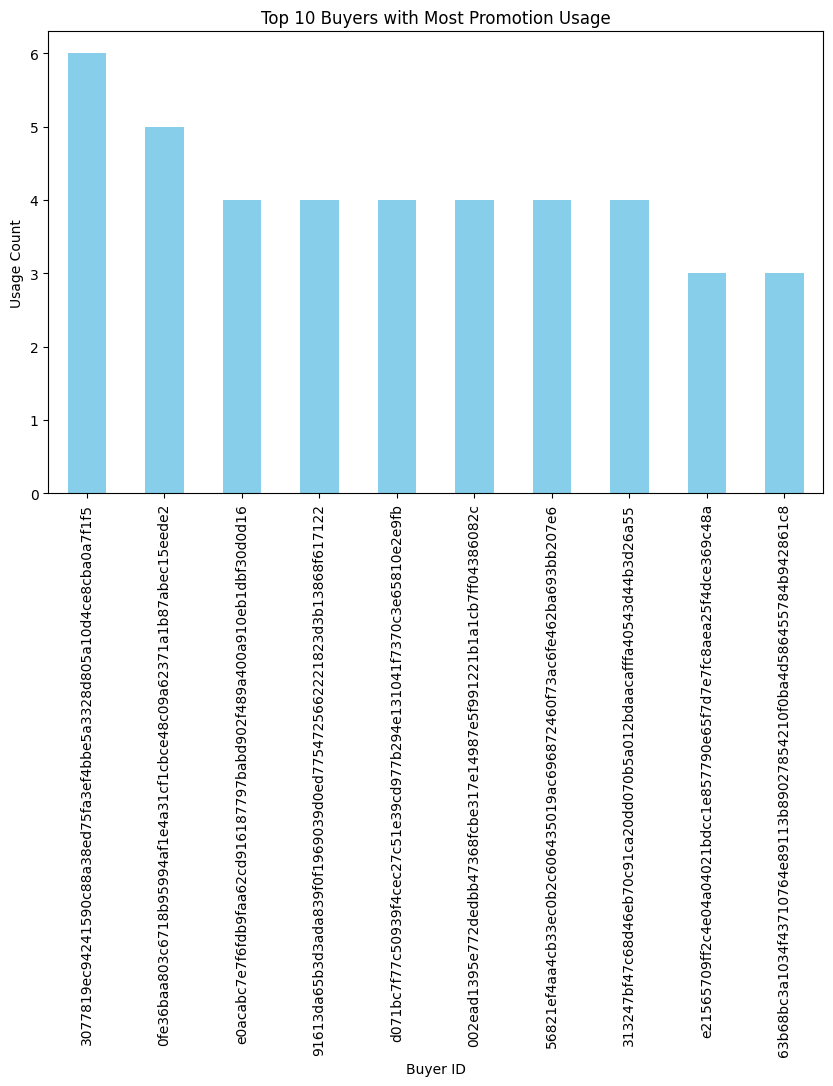

Potential Promotion Misuse Cases:
                                              buyer_id promotion_code  count
38   0fe36baa803c6718b95994af1e4a31cf1cbce48c09a623...    VISAPPRSCNC      4
114  3077819ec94241590c88a38ed75fa3ef4bbe5a3328d805...    VISAPPRSCNC      5
116  313247bf47c68d46eb70c91ca20dd070b5a012bdaacaff...   VISAPPRSCNC9      3
120  3367265f12b5b265841a9105f93b7de451f3d1570305aa...    VISAPPRSCNC      3
193  56821ef4aa4cb33ec0b2c606435019ac696872460f73ac...    VISAPPRSCNC      3
283  860f276a6f6d37a9e28fe96b5712e4d207a4e4e37f27cc...    VISAPPRSCNC      3
Low-value Transactions with Promotions:
Empty DataFrame
Columns: [dpt_id, dpt_promotion_id_x, buyer_id, seller_id, transaction_amount, payment_method_name, payment_provider_name, transaction_created_datetime, transaction_updated_datetime, dpt_promotion_id_y, promotion_code, promotion_name, transaction_promo_cashback_amount]
Index: []


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset df5
# Pastikan df5 sudah diimport sebelumnya
df5.info()

# Langkah 1: Eksplorasi Data
print(df5.describe())
print(df5.isnull().sum())  # Cek nilai kosong
print(df5.duplicated().sum())  # Cek duplikat

# Langkah 2: Pembersihan Data
df5 = df5.drop_duplicates()  # Hapus duplikat
df5 = df5.dropna()  # Hapus nilai kosong (atau gunakan imputasi jika diperlukan)

# Konversi kolom datetime ke format datetime
df5['transaction_created_datetime'] = pd.to_datetime(df5['transaction_created_datetime'])
df5['transaction_updated_datetime'] = pd.to_datetime(df5['transaction_updated_datetime'])

# Langkah 3: Analisis Aktivitas Promosi
# 1. Distribusi kode promosi
plt.figure(figsize=(10, 6))
sns.countplot(y='promotion_code', data=df5, order=df5['promotion_code'].value_counts().index)
plt.title("Distribusi Penggunaan Kode Promosi")
plt.xlabel("Jumlah Penggunaan")
plt.ylabel("Kode Promosi")
plt.show()

# 2. Analisis pembeli/penjual dengan penggunaan promosi terbanyak
top_buyers = df5.groupby('buyer_id')['dpt_promotion_id_x'].count().sort_values(ascending=False).head(10)
top_sellers = df5.groupby('seller_id')['dpt_promotion_id_x'].count().sort_values(ascending=False).head(10)

print("Top 10 Buyers with Most Promotion Usage:")
print(top_buyers)

print("Top 10 Sellers with Most Promotion Usage:")
print(top_sellers)

# Visualisasi Top Buyers
plt.figure(figsize=(10, 6))
top_buyers.plot(kind='bar', color='skyblue')
plt.title("Top 10 Buyers with Most Promotion Usage")
plt.xlabel("Buyer ID")
plt.ylabel("Usage Count")
plt.show()

# Langkah 4: Identifikasi Pola Penyalahgunaan
# 1. Pembeli yang menggunakan kode promosi yang sama secara berulang
repeated_promo_usage = df5.groupby(['buyer_id', 'promotion_code']).size().reset_index(name='count')
potential_abuse = repeated_promo_usage[repeated_promo_usage['count'] > 2]  # Threshold: >5

print("Potential Promotion Misuse Cases:")
print(potential_abuse)

# 2. Transaksi minimum untuk cashback
low_value_transactions = df5[df5['transaction_amount'] <= 4]  # Threshold transaksi minimum
print("Low-value Transactions with Promotions:")
print(low_value_transactions)
